1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
from scipy.stats import poisson

# Historical average
mu = 6.3
# Number of hurricanes in 2005
hurricanes_2005 = 15

# Probability of observing 15 or more hurricanes
p_value = 1 - poisson.cdf(hurricanes_2005 - 1, mu)
p_value


0.002217122790073134

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [2]:
import numpy as np
from scipy import stats

# Blood pressure data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

# Student's t-test
t_statistic, p_value = stats.ttest_rel(pre, post)
t_statistic, p_value


(-6.4346880142560465, 0.00012027728364544616)

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

C:\Users\rezvan\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


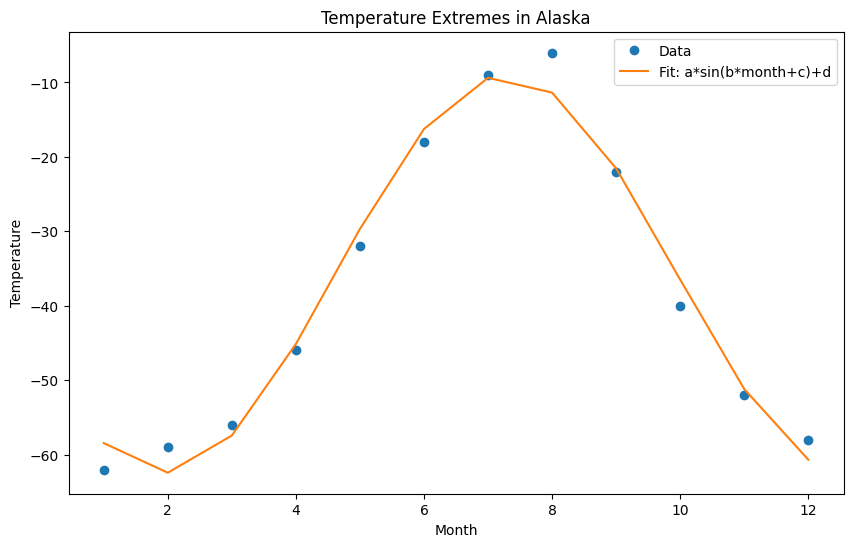

array([-26.72046589,  -5.69485773,  44.41086955, -35.72699031])

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Provided data
months = np.arange(1, 13)  # 1 to 12 for each month
temperatures = np.array([-62, -59, -56, -46, -32, -18, -9, -6, -22, -40, -52, -58])  # Temperatures

# Define a curve fitting function, for example, a sinusoidal function
def fit_func(month, a, b, c, d):
    return a * np.sin(b * month + c) + d

# Perform the curve fitting
params, covariance = curve_fit(fit_func, months, temperatures)

# Plot the data and the fit
plt.figure(figsize=(10, 6))
plt.plot(months, temperatures, 'o', label='Data')
plt.plot(months, fit_func(months, *params), label='Fit: a*sin(b*month+c)+d')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Temperature Extremes in Alaska')
plt.legend()
plt.show()

# Print the parameters
params


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

Chi-Squared Value: 849.1099300530791, Degrees of Freedom: 13, P-Value: 0.0


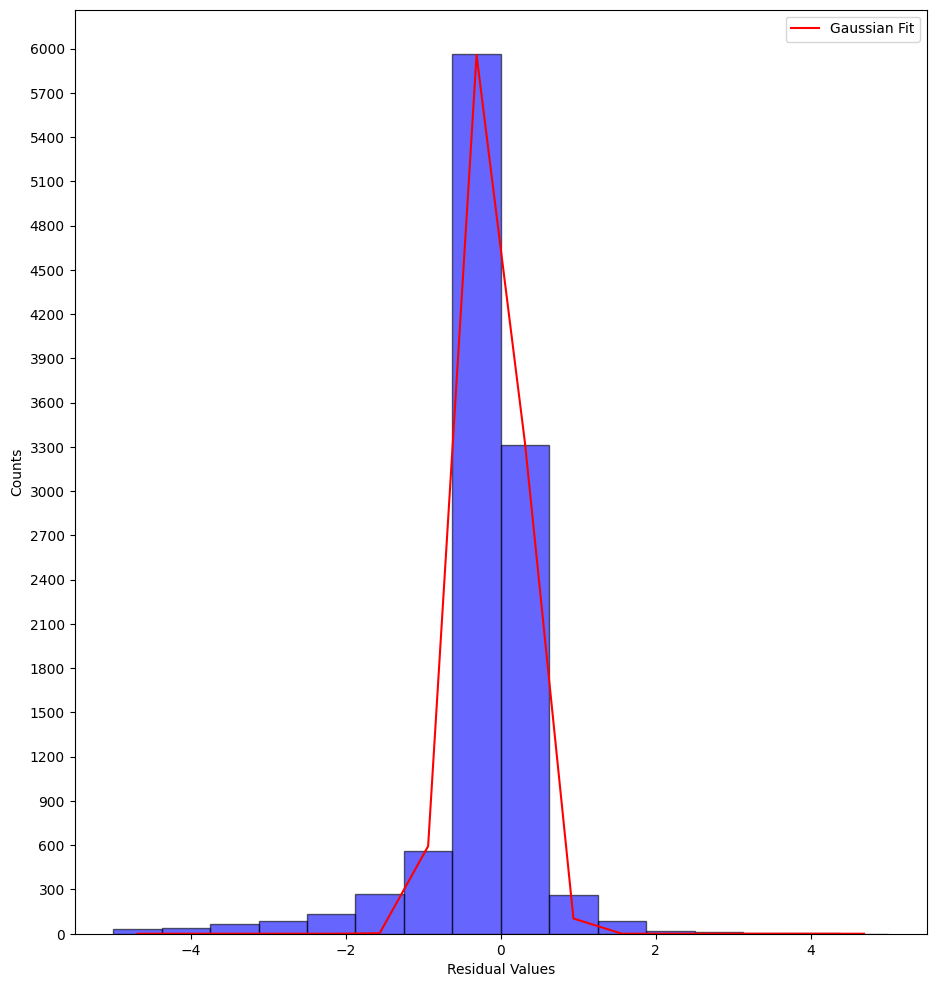

In [18]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.stats import chi2

# Load the residuals data from a pickle file
file_path = "./residuals_261.pkl"  # Update with your file path
with open(file_path, 'rb') as file:
    loaded_data = pickle.load(file).tolist()
    residuals_df = pd.DataFrame(loaded_data)

# Setting up the histogram for residuals
number_of_bins = 16
fig, residual_axis = plt.subplots(figsize=(11, 12))
counts, bin_edges, _ = residual_axis.hist(residuals_df['residuals'], bins=number_of_bins, range=(-5, 5), 
                                          color='blue', edgecolor='black', alpha=0.6)

residual_axis.set_xlabel("Residual Values")
residual_axis.set_ylabel("Counts")
residual_axis.yaxis.set_major_locator(plt.MultipleLocator(300))

# Calculating uncertainties for each bin
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
uncertainties = np.sqrt(counts)

# Defining the Gaussian function for curve fitting
def gaussian_func(x, amplitude, mean, std_dev):
    return amplitude * np.exp(- (x - mean)**2 / (2 * std_dev ** 2))

# Curve fitting
fit_params, fit_covariance = optimize.curve_fit(gaussian_func, bin_centers, counts, absolute_sigma=True)
fitted_curve = gaussian_func(bin_centers, *fit_params)
residual_axis.plot(bin_centers, fitted_curve, color="red", label="Gaussian Fit")
plt.legend()

# Performing chi-squared test
chi_sq = np.sum(((counts - fitted_curve) / uncertainties) ** 2)
degrees_of_freedom = number_of_bins - len(fit_params)
chi_sq_p_value = 1 - chi2.cdf(chi_sq, degrees_of_freedom)

# Display chi-squared test results
print(f"Chi-Squared Value: {chi_sq}, Degrees of Freedom: {degrees_of_freedom}, P-Value: {chi_sq_p_value}")


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

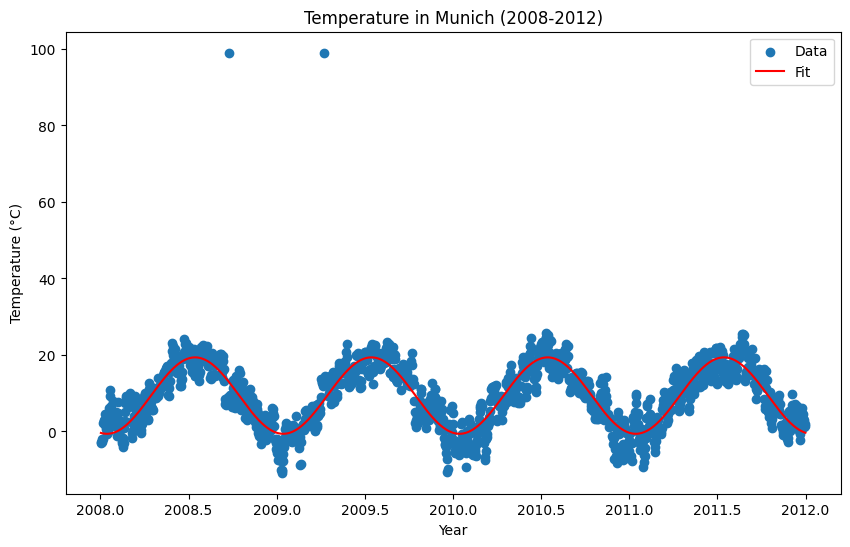

(array([-9.98813369, 12.33302301,  9.38411487]),
 array([0.17961047, 0.01798305, 0.12700529]),
 9.38411486809072,
 19.372248557225234,
 -0.6040188210437964)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Replace this with the path to your downloaded file
file_path = './munich_temperatures_average_with_bad_data.txt'

# Load data from the local file
data = pd.read_csv(file_path, sep=' ', header=None, names=['Year', 'Temperature'])

# Filter out bad data and focus on the range 2008 to 2012
filtered_data = data[(data['Year'] >= 2008) & (data['Year'] <= 2012) & (data['Temperature'] > -50)]

# Define the function to fit
def temperature_model(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

# Fit the model
popt, pcov = curve_fit(temperature_model, filtered_data['Year'], filtered_data['Temperature'])

# Plot the data and the fit
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Year'], filtered_data['Temperature'], label='Data')
plt.plot(filtered_data['Year'], temperature_model(filtered_data['Year'], *popt), color='red', label='Fit')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Munich (2008-2012)')
plt.legend()
plt.show()

# Best-fit values and uncertainties
best_fit_params = popt
uncertainties = np.sqrt(np.diag(pcov))

# Overall average temperature (parameter c)
average_temperature = best_fit_params[2]

# Typical daily average values for the coldest and hottest times of the year
coldest_temp = best_fit_params[2] - best_fit_params[0]
hottest_temp = best_fit_params[2] + best_fit_params[0]

best_fit_params, uncertainties, average_temperature, coldest_temp, hottest_temp
